# Experiment 1
**model**: resnet18\
**dataset:** cifar

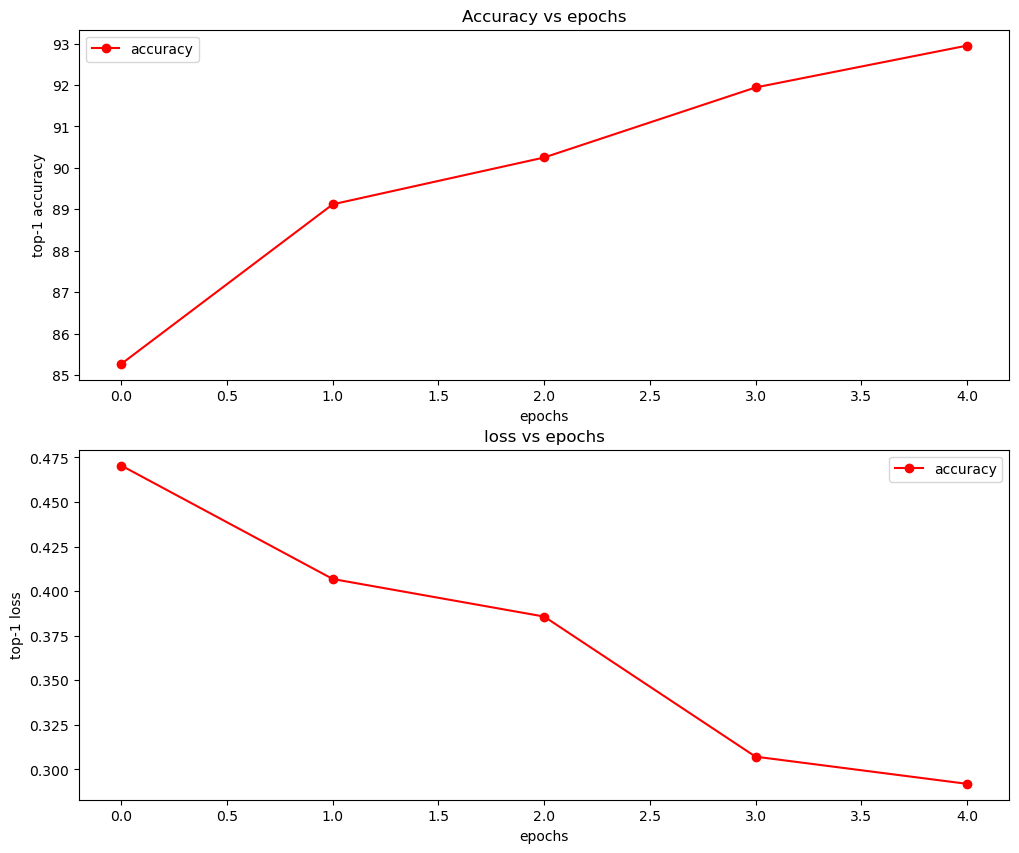

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os

## settings
save = False
show = True

# load data
date = '2024_03_28'
filenames = [
  'similarity_z_test_acc_100_mnist_mlp_True_0.0001_50_0_5_13_36_23.npz',
  'similarity_z_test_loss_100_mnist_mlp_True_0.0001_50_0_5_13_36_23.npz'
]
path = '../save/' + date + '/' + filenames[0]
x_vals, y_vals = np.load(path)['x'], np.load(path)['y']

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(x_vals, y_vals, label='accuracy', linestyle='-', marker='o', color='r')

# Add labels and title
plt.xlabel('epochs')
plt.ylabel('top-1 accuracy')
plt.title('Accuracy vs epochs')

# Add legend
plt.legend()

# PLOT 2
path = '../save/' + date + '/' + filenames[1]
x_vals, y_vals = np.load(path)['x'], np.load(path)['y']

# plot
plt.subplot(2,1,2)
plt.plot(x_vals, y_vals, label='accuracy', linestyle='-', marker='o', color='r')

# Add labels and title
plt.xlabel('epochs')
plt.ylabel('top-1 loss')
plt.title('loss vs epochs')

# Add legend
plt.legend()


# Save plot
if save:
  # TODO implement a propper path
  png_filename = os.path.splitext(os.path.basename(path))[0] + '.png'
  plt.savefig('../save/{date}/{png_filename}.png'.format())

# Show plot
if show:
  plt.show()